In [1]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [23]:
data.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [12]:
data.duplicated().sum()

1

In [16]:
fig = px.histogram(data, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
px.histogram(data,x="region",color="smoker",title="Region")

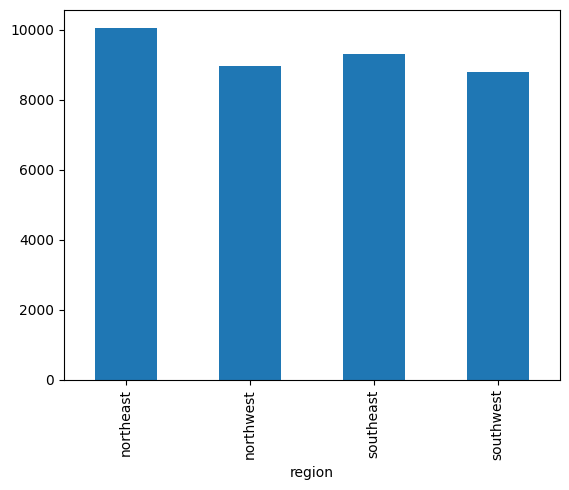

In [25]:
data.groupby("region")["expenses"].median().plot.bar()
plt.show()

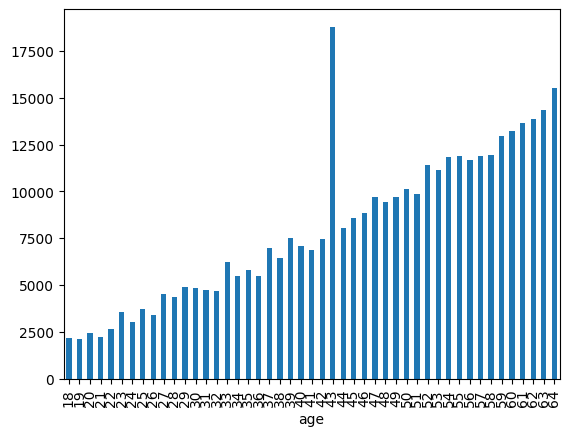

In [26]:
data.groupby("age")['expenses'].median().plot.bar()
plt.show()

In [28]:
fig = px.pie(data_frame=data, names='sex', values='expenses', width=800, height=500, title='Expenses by Gender')
fig.show()

In [43]:
data.expenses.corr(data.age)

0.29900819228508263

In [5]:
X = data.drop(['expenses'], axis=1)
y = data['expenses']

In [7]:
X.to_csv('clean_data.csv')

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [9]:
numeric_features = ['age', 'bmi', 'children']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_features = ['sex', 'smoker','region']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
print(preprocessor)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [54]:
from sklearn.metrics import mean_squared_error,r2_score

In [55]:
lr = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_r2_score = r2_score(y_test, y_pred)

print("The Mean Squared Error using Linear Regression :{}".format(lr_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(lr_rmse)))
print(('The r2_score using Linear Regression :{}'.format(lr_r2_score)))

The Mean Squared Error using Linear Regression :31823064.323450267
The Root Mean Squared Error using Linear Regression :5641.193519411497
The r2_score using Linear Regression :0.8000184017333828


In [57]:
dt = Pipeline(steps=[('preprocessor', preprocessor),
                        ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
dt.fit(x_train, y_train)

y_pred1 = dt.predict(x_test)

dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = mean_squared_error(y_test, y_pred1, squared=False)
dt_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(dt_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(dt_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(dt_r2_score))

The Mean Squared Error using Decision Tree Regressor : 31823064.323450267
The Root Mean Squared Error using Decision Tree Regressor : 4365.623719926021
The r2_score using Decision Tree Regressor : 0.8802320436057114


In [58]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('random_forest_regressor', RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42))])
rf.fit(x_train,y_train)

y_pred2=rf.predict(x_test)

rf_mse = mean_squared_error(y_test, y_pred2)
rf_rmse = mean_squared_error(y_test, y_pred2, squared=False)
rf_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(rf_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(rf_rmse))
print("The r2_score using Random Forest Regressor : {}".format(rf_r2_score))

The Mean Squared Error using Random Forest Regressor : 16230839.460296616
The Root Mean Squared Error using Random Forest Regressor : 4028.7516007190884
The r2_score using Random Forest Regressor : 0.8980026189970923


In [65]:
gb = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor(n_estimators=40, max_depth=4, min_samples_split=4))])
gb.fit(x_train,y_train)

y_pred3=gb.predict(x_test)

gb_mse = mean_squared_error(y_test, y_pred3)
gb_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gb_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gb_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gb_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gb_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 16501454.648546465
The Root Mean Squared Error using Gradient Boosting Regressor : 4062.198253230197
The r2_sccore using Gradient Boosting Regressor : 0.8963020267061875


In [68]:
knn = Pipeline(steps=[('preprocessor', preprocessor),
                ('knn', KNeighborsRegressor(n_neighbors=5))])

knn.fit(x_train, y_train)

y_pred4 = knn.predict(x_test)

knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

print("The mean squared error using KNN is {}".format(knn_mse))
print("The root mean squared error using KNN is {}".format(knn_rmse))
print("The r2_score using KNN is {}".format(knn_r2_score))

The mean squared error using KNN is 30453656.910110194
The root mean squared error using KNN is 5518.483207377748
The r2_score using KNN is 0.8086239929616322


In [69]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','Gradient Boosting', 'KNN'],
    'RMSE' : [lr_rmse, dt_rmse, rf_rmse,gb_rmse, knn_rmse],
    'r2_score' : [lr_r2_score, dt_r2_score, rf_r2_score, gb_r2_score, knn_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
2,Random Forest,4028.751601,0.898003
3,Gradient Boosting,4062.198253,0.896302
1,Decision Tree,4365.623720,0.880232
4,KNN,5518.483207,0.808624
0,Linear Regression,5641.193519,0.800018


In [70]:
import pickle

In [71]:
pickle.dump(rf, open('random_forest_model.pkl', 'wb'))